In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
dataframe = pd.read_csv('totalfworkforce.csv')
display(dataframe.shape)
display(dataframe.columns)
display(dataframe)

In [ ]:
x = np.arange(len(dataframe))

for i in range(1, 7):
 
    plt.figure(figsize=(12, 8))
    plt.bar(x, dataframe.iloc[:, i], width=0.8, label=dataframe.columns[i], color='skyblue')
    plt.xlabel('States', fontsize=14)
    plt.ylabel(dataframe.columns[i], fontsize=14)
    plt.title(f'State vs {dataframe.columns[i]}', fontsize=18)
    plt.xticks(x, dataframe.iloc[:, 0], rotation=90)
    plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
    plt.gca().ticklabel_format(style='plain', axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()  

In [ ]:
scaler = StandardScaler()
cultivators = dataframe[['Cultivators', 'Male Cultivators', 'Female Cultivators']]
scaled_features = scaler.fit_transform(cultivators)

k_range = range(2, 10)
inertia = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, 'bx-')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.title("Elbow method")
plt.show()

In [14]:
kmeans = KMeans(n_clusters=4, random_state=42)
cultivators['cluster'] = kmeans.fit_predict(scaled_features)
clusters_counts = cultivators['cluster'].value_counts()
sorted_clusters = clusters_counts.sort_index(ascending=True)
grouped = cultivators.groupby('cluster').sum()
clusters = pd.DataFrame(clusters_counts.sort_index(ascending=True))
display(clusters)
display(grouped)

C:\Users\jayesh\AppData\Local\Temp\ipykernel_5404\344215680.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cultivators['cluster'] = kmeans.fit_predict(scaled_features)


,count
cluster,
0,20
1,4
2,3
3,8


,Cultivators,Male Cultivators,Female Cultivators
cluster,,,
0,10171123,6236695,3934428
1,30112836,21447496,8665340
2,45246131,30622332,14623799
3,33278690,24456411,8822279


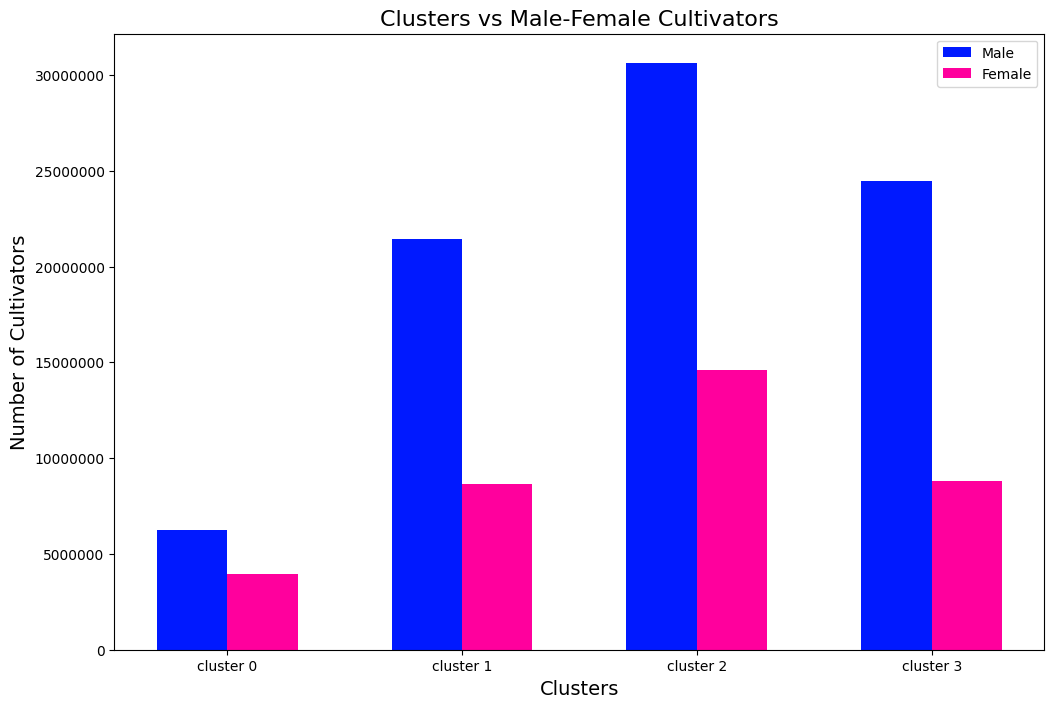

In [15]:
z = np.arange(len(clusters))
indexlist = clusters.index.tolist()

plt.figure(figsize=(12, 8))
plt.bar(z-0.15, grouped['Male Cultivators'], width=0.3, color='#0019ff', label='Male')
plt.bar(z+0.15, grouped['Female Cultivators'], width=0.3, color='#ff009d', label='Female')
plt.gca().yaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='y')
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Number of Cultivators', fontsize=14)
plt.title('Clusters vs Male-Female Cultivators', fontsize=16) 
plt.xticks(z, [f"cluster {i}" for i in range(0,4)], fontsize=10)
plt.legend()
plt.show()

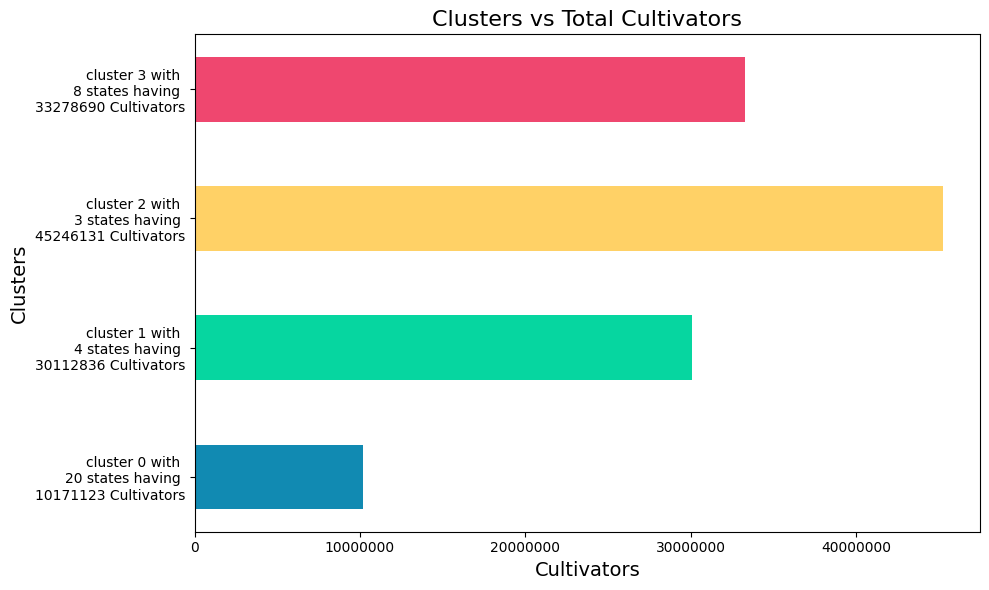

In [16]:
colors = ['#118ab2', '#06d6a0', '#ffd166', '#ef476f']

plt.figure(figsize=(10, 6))
plt.barh([f"cluster {i} with \n{clusters.iloc[i, 0]} states having \n{grouped.iloc[i, 0]} Cultivators" for i in range(0, 4)], grouped['Cultivators'], height=0.5, color=colors)
plt.gca().xaxis.set_major_formatter(mticker.ScalarFormatter(useOffset=False))
plt.gca().ticklabel_format(style='plain', axis='x')
plt.xlabel('Cultivators', fontsize=14)
plt.ylabel('Clusters', fontsize=14)
plt.title('Clusters vs Total Cultivators', fontsize=16)
plt.tight_layout()
plt.show()

In [8]:
display("From above graph we can see that cluster 2 has less number of states and maximum number of agricultural workforce")
display("which is easy to target.")
cluster2_index = []
for i in range(len(cultivators)):
    if (cultivators.iloc[i, 3] == 2):
        cluster2_index.append(i)
display("States : ")
for i in range(len(cluster2_index)):
    print(dataframe.iloc[cluster2_index[i], 0], ":", dataframe.iloc[cluster2_index[i], 1], "cultivators")
display("Total number of farmers : ", grouped.iloc[2, 0])

'From above graph we can see that cluster 2 has less number of states and maximum number of agricultural workforce'

'which is easy to target.'

'States : '

Rajasthan : 13618870 cultivators
Uttar Pradesh : 19057888 cultivators
Maharashtra : 12569373 cultivators


'Total number of farmers : '

45246131